# ODE-IVP's: Runge-Kutta Methods
---

GENERAL PROBLEM: solve the system of first-order ordinary differential equations of the form

\begin{equation}
  \mathbf{y}'(x) \equiv \frac{d}{dx}\mathbf{y}(x) = \mathbf{f}(\mathbf{y}(x),x)
  \quad\text{with}\quad
  \mathbf{y}(x_{0}) = \mathbf{y}_{0}.
\end{equation}

IDEA: ???

PRE-REQUISITES:
- ODE-IVP's: Euler methods
- Runge-Kutta theory (???)

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] Burden and Faires, *Numerical Analysis, 7th edition*.
- [4] LeVeque, *Finite Difference Methods for Ordinary and Partial Differential Equations*.
- [5] Press et al, *Numerical Recipes, 3rd edition*.

In [1]:
%%writefile rk4.py
def rk4_step (x, y, f, h):
    """
    Fourth-order Runge-Kutta method to solve a system of first-order 
    differential equations subject to initial conditions.
    
    INPUT
    x : current x position
    y : current y values (1D array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    YY : new y value (1D array)
    
    """
        
    # Runge-Kutta weights
    b1 = 1/6
    b2 = 1/3
    b3 = 1/3
    b4 = 1/6
    
    # Runge-Kutta nodes
    c1 = 0
    c2 = 1/2
    c3 = 1/2
    c4 = 1
    
    # Runge-Kutta matrix elements
    a21 = 1/2;
    a31 = 0; a32 = 1/2 ;
    a41 = 0; a42 = 0 ; a43 = 1;

    # Runge-Kutta stages
    k1 = f(x + h*c1, y)
    k2 = f(x + h*c2, y + h*(a21*k1))
    k3 = f(x + h*c3, y + h*(a31*k1 + a32*k2))
    k4 = f(x + h*c4, y + h*(a41*k1 + a42*k2 + a43*k3))
       
    # advance the solution
    YY = y + h*(b1*k1 + b2*k2 + b3*k3 + b4*k4)
        
    return YY 

Overwriting rk4.py


In [2]:
%%writefile rk45_fehlberg.py
import numpy as np
def rk45f_step (x, y, f, h):
    """
    Fourth-order Runge-Kutta-Fehlberg method with fifth-order local truncation error.
    RK weights, nodes, matrix elements are those of Fehlberg's original paper.
    
    INPUT
    x : current x position
    y : current y values (1D array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    YY4 : new y value (1D array), based on lower 4th-order step
    LTE : estimated local truncation error
    
    """

    # Runge-Kutta-Fehlberg weights
    b1 = 25/216
    b2 = 0
    b3 = 1408/2565
    b4 = 2197/4104
    b5 = -1/5
    b6 = 0

    e1 = 16/135
    e2 = 0
    e3 = 6656/12825
    e4 = 28561/56430
    e5 = -9/50
    e6 = 2/55

    # Runge-Kutta-Fehlberg nodes
    c1 = 0
    c2 = 1/4
    c3 = 3/8
    c4 = 12/13
    c5 = 1
    c6 = 1/2
    
    # Runge-Kutta-Fehlberg matrix elements
    a21 = 1/4;
    a31 = 3/32;      a32 = 9/32;
    a41 = 1932/2197; a42 = -7200/2197; a43 = 7296/2197;
    a51 = 439/216;   a52 = -8;         a53 = 3680/513;   a54 = -845/4104;
    a61 = -8/27;     a62 = 2;          a63 = -3544/2565; a64 = 1859/4104; a65 = -11/40;

    # Runge-Kutta-Fehlberg stages    
    k1 = f(x + h*c1, y)
    k2 = f(x + h*c2, y + h*(a21*k1))
    k3 = f(x + h*c3, y + h*(a31*k1 + a32*k2))
    k4 = f(x + h*c4, y + h*(a41*k1 + a42*k2 + a43*k3))
    k5 = f(x + h*c5, y + h*(a51*k1 + a52*k2 + a53*k3 + a54*k4))
    k6 = f(x + h*c6, y + h*(a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5))
       
    # advance the solution, calculate local truncation error
    YY4 = y + h*(b1*k1 + b2*k2 + b3*k3 + b4*k4 + b5*k5 + b6*k6)
    YY5 = y + h*(e1*k1 + e2*k2 + e3*k3 + e4*k4 + e5*k5 + e6*k6)
    LTE = np.abs(YY4 - YY5)
        
    return YY4, LTE

Overwriting rk45_fehlberg.py


In [3]:
%%writefile rk45_cash_karp.py
import numpy as np
def rk45ck_step (x, y, f, h):
    """
    Fourth-order Runge-Kutta-Fehlberg method with fifth-order local truncation error.
    RK weights, nodes, matrix elements are those of Cash and Karp, as recommended by Numerical Recipes.
    
    INPUT
    x : current x position
    y : current y values (1D array)
    f : rhs function handle (takes x and y as arguments)
    h : current stepsize
    
    OUTPUT
    YY4 : new y value (1D array), based on lower 4th-order step
    LTE : estimated local truncation error
    
    """
    
    # Runge-Kutta-Fehlberg weights
    b1 = 37/378
    b2 = 0
    b3 = 250/621
    b4 = 125/594
    b5 = 0
    b6 = 512/1771

    e1 = 2825/27648
    e2 = 0
    e3 = 18575/48384
    e4 = 13525/55296
    e5 = 277/14336
    e6 = 1/4

    # Runge-Kutta-Fehlberg nodes
    c1 = 0
    c2 = 1/5
    c3 = 3/10
    c4 = 3/5
    c5 = 1
    c6 = 7/8
    
    # Runge-Kutta-Fehlberg matrix elements
    a21 = 1/5;
    a31 = 3/40;       a32 = 9/40;
    a41 = 3/10;       a42 = -9/10;   a43 = 6/5;
    a51 = -11/54;     a52 = 5/2;     a53 = -70/27;    a54 = 35/27;
    a61 = 1631/55296; a62 = 175/512; a63 = 575/13824; a64 = 44275/110592; a65 = 253/4096;

    # Runge-Kutta-Fehlberg stages    
    k1 = f(x + h*c1, y)
    k2 = f(x + h*c2, y + h*(a21*k1))
    k3 = f(x + h*c3, y + h*(a31*k1 + a32*k2))
    k4 = f(x + h*c4, y + h*(a41*k1 + a42*k2 + a43*k3))
    k5 = f(x + h*c5, y + h*(a51*k1 + a52*k2 + a53*k3 + a54*k4))
    k6 = f(x + h*c6, y + h*(a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5))
       
    # advance the solution, calculate local truncation error
    YY4 = y + h*(b1*k1 + b2*k2 + b3*k3 + b4*k4 + b5*k5 + b6*k6)
    YY5 = y + h*(e1*k1 + e2*k2 + e3*k3 + e4*k4 + e5*k5 + e6*k6)
    LTE = np.abs(YY4 - YY5)
        
    return YY4, LTE

Overwriting rk45_cash_karp.py


In [15]:
%run euler.py
%run euler_midpt.py
%run euler_meanval.py
%run rk4.py
%run rk45_fehlberg.py
%run rk45_cash_karp.py

<IPython.core.display.Javascript object>


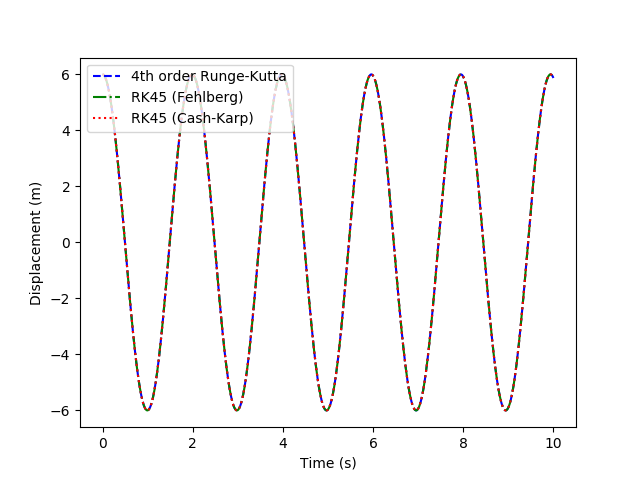

In [16]:
# oscillator
"""
Program to compute the motion of a one-dimensional oscillator
"""

# set graphics backend
%matplotlib notebook

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# oscillator rhs function
def f (t, x):
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = -omega0**2*x[0] - 2*beta*x[1] + F(t, f0, omegaF)
    return dxdt

# driving force
def F(t, amp, freq):
    return amp*np.cos(freq*t)

# set model parameters
mass = 1.0
springK = 10.0
omega0 = np.sqrt(springK/mass)
beta = 0.0
f0 = 0.0
omegaF = 0.*omega0

# set initial position and velocity 
x0 = 6.0
v0 = 0.0

# number of steps, time grid, stepsize
tStart = 0.0
tEnd = 10.0
nsteps = 1000
h = (tEnd - tStart)/nsteps
t = np.linspace(tStart, tEnd, nsteps + 1)
#print('Stepsize = %g \n' % h)

# initialize output arrays (euler)
x = np.zeros((2, nsteps + 1))
x[0] = x0
x[1] = v0

# initialize output arrays (midpoint euler)
x_mid = np.zeros_like(x)
x_mid[0] = x[0]
x_mid[1] = x[1]

# initialize output arrays (mean-value euler)
x_mv = np.zeros_like(x)
x_mv[0] = x[0]
x_mv[1] = x[1]

# initialize output arrays (4th order Runge-Kutta)
x_rk4 = np.zeros_like(x)
x_rk4[0] = x[0]
x_rk4[1] = x[1]

# initialize output arrays (4th order Runge-Kutta-Fehlberg)
x_rkf45 = np.zeros_like(x)
x_rkf45[0] = x[0]
x_rkf45[1] = x[1]
lte_rkf45 = np.zeros_like(x)
lte_rkf45[0] = 0.0
lte_rkf45[1] = 0.0

# initialize output arrays (4th order Runge-Kutta-Fehlberg, Cash-Karp variant)
x_ck45 = np.zeros_like(x)
x_ck45[0] = x[0]
x_ck45[1] = x[1]
lte_ck45 = np.zeros_like(x)
lte_ck45[0] = 0.0
lte_ck45[1] = 0.0

# numerical solution 
for i in range(0, nsteps): 

    # apply ODE-solver step
    x[:,i+1] = euler_step(t[i], x[:,i], f, h)
    x_mid[:,i+1] = euler_midpt_step(t[i], x_mid[:,i], f, h)
    x_mv[:,i+1] = euler_meanval_step(t[i], x_mv[:,i], f, h)
    x_rk4[:,i+1] = rk4_step(t[i], x_rk4[:,i], f, h)
    x_rkf45[:,i+1], lte_rkf45[:,i+1] = rk45f_step(t[i], x_rkf45[:,i], f, h)
    x_ck45[:,i+1], lte_ck45[:,i+1] = rk45ck_step(t[i], x_ck45[:,i], f, h)
    t[i+1] = t[i] + h

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
#ax1.plot(t, x[0,:],'r-.', label='simple Euler')
#ax1.plot(t, x_mid[0,:],'m:', label='midpoint Euler')
#ax1.plot(t, x_mv[0,:],'m-.', label='mean-value Euler')
ax1.plot(t, x_rk4[0,:],'b--', label='4th order Runge-Kutta')
ax1.plot(t, x_rkf45[0,:],'g-.', label='RK45 (Fehlberg)')
ax1.plot(t, x_ck45[0,:],'r:', label='RK45 (Cash-Karp)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (m)')
ax1.legend(loc='upper left')
fig.show()

<IPython.core.display.Javascript object>


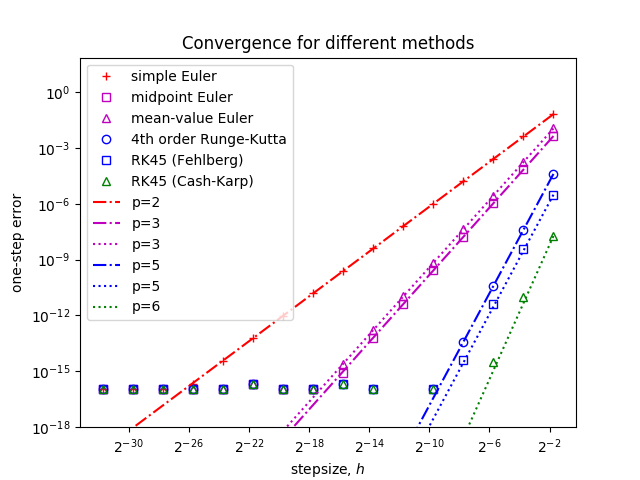

In [18]:
### convergence test ###
import numpy as np 

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def y_exact(x, x0 ,y0):
    return (x + 1)**2 + (y0 - (x0 + 1)**2)*np.exp(x - x0)

# initial conditions
x0 = 0.
y0 = 0.5

# compute stepsizes
xmin = x0
xmax = 3.0
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 30, 16, base=2)
hvals = (xmax - xmin)/nsteps

# initialize one-step error arrays
err_eul = np.zeros_like(hvals)
err_mid = np.zeros_like(hvals)
err_mv = np.zeros_like(hvals)
err_rk4 = np.zeros_like(hvals)
err_rkf45 = np.zeros_like(hvals)
err_ck45 = np.zeros_like(hvals)

# calculate one-step error for different resolutions
for i in range(0, len(hvals)):

    # step-size 
    h = hvals[i]

    # initialize output arrays
    x = np.zeros(2)
    x[0] = x0

    y_eul = np.zeros_like(x)
    y_eul[0] = y0

    y_mid = np.zeros_like(x)
    y_mid[0] = y0

    y_mv = np.zeros_like(x)
    y_mv[0] = y0

    y_rk4 = np.zeros_like(x)
    y_rk4[0] = y0

    y_rkf45 = np.zeros_like(x)
    y_rkf45[0] = y0
    lte_rkf45 = np.zeros_like(x)
    lte_rkf45[0] = 0

    y_ck45 = np.zeros_like(x)
    y_ck45[0] = y0
    lte_ck45 = np.zeros_like(x)
    lte_ck45[0] = 0
    
    # numerical solutions
    x[1] = x[0] + h
    y_eul[1] = euler_step(x[0], y_eul[0], f, h)
    y_mid[1] = euler_midpt_step(x[0], y_mid[0], f, h)
    y_mv[1] = euler_meanval_step(x[0], y_mv[0], f, h)
    y_rk4[1] = rk4_step(x[0], y_rk4[0], f, h)
    y_rkf45[1], lte_rkf45[1] = rk45f_step(x[0], y_rkf45[0], f, h)
    y_ck45[1], lte_ck45[1] = rk45ck_step(x[0], y_ck45[0], f, h)

    # calculate one-step errors
    err_eul[i] = np.abs(y_eul[1] - y_exact(x[1], x0, y0))
    err_mid[i] = np.abs(y_mid[1] - y_exact(x[1], x0, y0))
    err_mv[i] = np.abs(y_mv[1] - y_exact(x[1], x0, y0))
    err_rk4[i] = np.abs(y_rk4[1] - y_exact(x[1], x0, y0))
    err_rkf45[i] = np.abs(y_rkf45[1] - y_exact(x[1], x0, y0))
    err_ck45[i] = np.abs(y_ck45[1] - y_exact(x[1], x0, y0))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals, err_eul, 'r+', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='simple Euler')
ax1.loglog(hvals, err_mid, 'ms', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='midpoint Euler')
ax1.loglog(hvals, err_mv, 'm^', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='mean-value Euler')
ax1.loglog(hvals, err_rk4, 'bo', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='4th order Runge-Kutta')
ax1.loglog(hvals, err_rkf45, 'bs', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='RK45 (Fehlberg)')
ax1.loglog(hvals, err_ck45, 'g^', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='RK45 (Cash-Karp)')
ax1.loglog(hvals, err_eul[0]*(hvals/hvals[0])**2, 'r-.', label='p=2')
ax1.loglog(hvals, err_mid[0]*(hvals/hvals[0])**3, 'm-.', label='p=3')
ax1.loglog(hvals, err_mv[0]*(hvals/hvals[0])**3, 'm:', label='p=3')
ax1.loglog(hvals, err_rk4[0]*(hvals/hvals[0])**5, 'b-.', label='p=5')
ax1.loglog(hvals, err_rkf45[0]*(hvals/hvals[0])**5, 'b:', label='p=5')
ax1.loglog(hvals, err_ck45[0]*(hvals/hvals[0])**6, 'g:', label='p=6')
ax1.set_xscale('log', basex=2)
ax1.set_xlabel(r"stepsize, $h$")
ax1.set_ylabel(r"one-step error")
ax1.set_ylim(1e-18)
ax1.set_title("Convergence for different methods")
ax1.legend(loc="upper left", numpoints=1)
fig.show()